#超參數(Hyperparameters)

在機器學習模型中，需要人工選擇的參數稱為超參數。比如決策樹的深度、分支度，人工神經網絡模型中隱藏層層數和每層的節點個數，正則項中常數大小等等，他們都需要事先指定。超參數選擇不恰當，就會出現欠擬合或者過擬合的問題。而在選擇超參數的時候，有兩個途徑，一個是憑經驗微調，另一個就是選擇不同大小的參數，帶入模型中，挑選表現最好的參數。

##超參數搜尋

微調的一種方法是手工調製超參數，直到找到一個好的超參數組合，這麼做的話會非常冗長，你也可能沒有時間探索多種組合，所以可以使用Scikit-Learn的GridSearchCV來做這項搜索工作。

##GridSearchCV

GridSearchCV可以保證在指定的參數範圍內找到精度最高的參數，但是這也是網格搜索的缺陷所在，他要求遍歷所有可能參數的組合，在面對大數據集和多參數的情況下，非常耗時。

##超參數例子

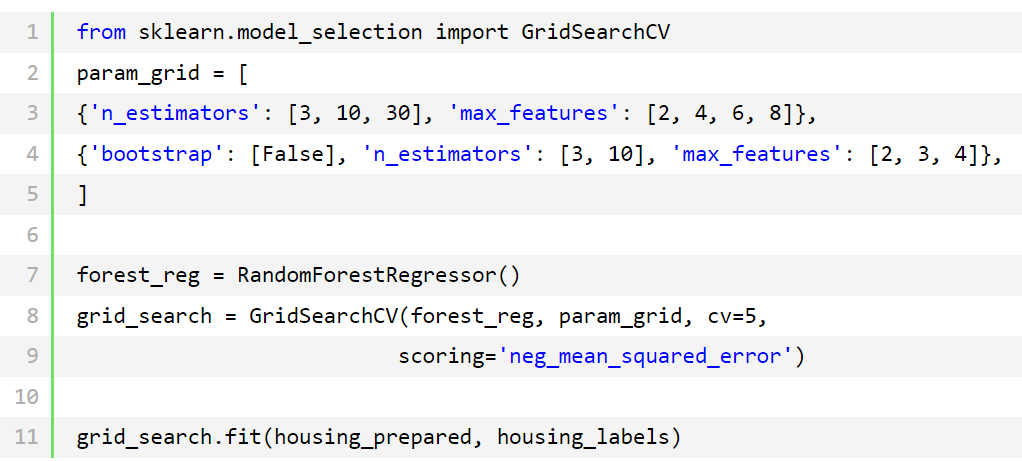

超參數組合方式幾種?



總共訓練幾次?



##實作練習：

網頁中廣告圖片的辨識(ad.data)-使用decision tree

In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/機器學習colaboratory/ch12模型優化與超參數_s/ad (1).data",header=None)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [4]:
var_col = set(df.columns.values)

In [5]:
var_col.remove(len(df.columns.values)-1)

In [6]:
label_col=df[len(df.columns.values)-1]
label_col

0          ad.
1          ad.
2          ad.
3          ad.
4          ad.
         ...  
3274    nonad.
3275    nonad.
3276    nonad.
3277    nonad.
3278    nonad.
Name: 1558, Length: 3279, dtype: object

In [7]:
y = [1 if e=='ad.' else 0 for e in label_col]
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [8]:
X = df[list(var_col)].copy()
X

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X.replace(to_replace=' *?' , value = 1 , regex = True , inplace = True)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [11]:
from sklearn.svm import SVC

In [12]:
clf = SVC().fit(X_train,y_train)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9585365853658536

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8454545454545453

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [17]:
pipeline = Pipeline([('clf',SVC())])

In [18]:
paremeter = {
    'clf__kernel':('linear','rbf','poly'),
    'clf__C':(0.1 , 1 , 10 , 100),
    'clf__gamma':(1, 0.1 , 0.01 , 0.001)
}

In [19]:
grid_search = GridSearchCV(pipeline,paremeter,n_jobs=-1,scoring='f1')

In [20]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('clf', SVC())]), n_jobs=-1,
             param_grid={'clf__C': (0.1, 1, 10, 100),
                         'clf__gamma': (1, 0.1, 0.01, 0.001),
                         'clf__kernel': ('linear', 'rbf', 'poly')},
             scoring='f1')

In [21]:
grid_search.best_score_

0.9007889139167409

In [22]:
from sklearn .metrics import classification_report
pred = grid_search.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       695
           1       0.97      0.80      0.88       125

    accuracy                           0.97       820
   macro avg       0.97      0.90      0.93       820
weighted avg       0.97      0.97      0.96       820



In [23]:
best_p = grid_search.best_estimator_.get_params()

In [24]:
for pn in sorted(paremeter.keys()):
  print('t%s %r' % (pn,best_p[pn]))


tclf__C 10
tclf__gamma 0.01
tclf__kernel 'rbf'
